# Assignment #2 - Experiments
## Base Feed Forward Neural Networks
Author: **Jakub Biegas**
Student index: **260344**

### Fashion MNIST labels

In [1]:
FASHION_MNIST_LABELS = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

## Import Fashion MNIST dataset

In [2]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Reshape and normalize the dataset

In [3]:
X_train = X_train.reshape(X_train.shape[0], 784).astype("float32") / 255.0
X_test = X_test.reshape(X_test.shape[0], 784).astype("float32") / 255.0

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### Plot samples from the Fashion MNIST dataset

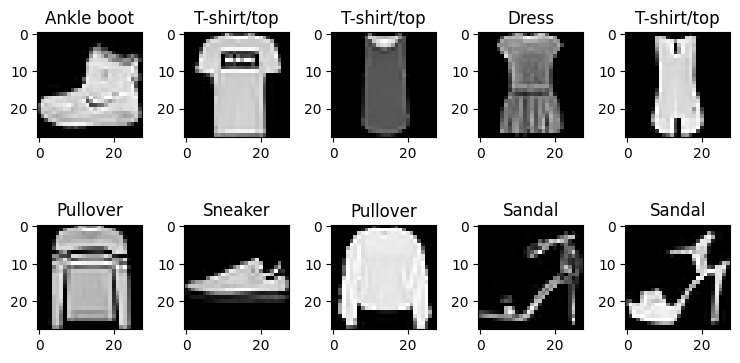

In [4]:
from assignment_2.utils.plot import plot_samples

plot_samples(X_train, y_train)

## Load pickled autoencoders

In [5]:
from assignment_2.utils.pickle import load_pickle

autoencoder_1 = load_pickle("pickles/autoencoder_1.pickle")
autoencoder_optimizer_1 = load_pickle("pickles/autoencoder_optimizer_1.pickle")

autoencoder_2 = load_pickle("pickles/autoencoder_2.pickle")
autoencoder_optimizer_2 = load_pickle("pickles/autoencoder_optimizer_2.pickle")

autoencoder_3 = load_pickle("pickles/autoencoder_3.pickle")
autoencoder_optimizer_3 = load_pickle("pickles/autoencoder_optimizer_3.pickle")

autoencoder_4 = load_pickle("pickles/autoencoder_4.pickle")
autoencoder_optimizer_4 = load_pickle("pickles/autoencoder_optimizer_4.pickle")

autoencoder_5 = load_pickle("pickles/autoencoder_5.pickle")
autoencoder_optimizer_5 = load_pickle("pickles/autoencoder_optimizer_5.pickle")

## Process and visualize unseen examples

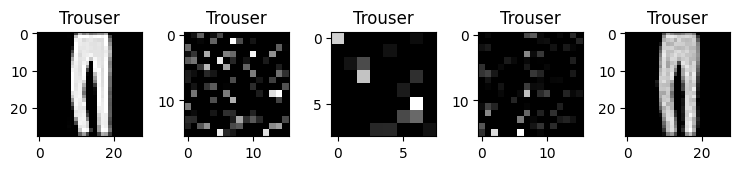

In [6]:
from assignment_2.utils.plot import plot_autoencoder_layers

trouser_image, trouser_label = X_test[2], y_test[2]
trouser_outputs = autoencoder_4.forward(trouser_image)

trouser_layers_to_visualize = [
    trouser_image.reshape(28, 28),
    autoencoder_4.hidden_layers[0].outputs.reshape(16, 16),
    autoencoder_4.code.reshape(8, 8),
    autoencoder_4.hidden_layers[4].outputs.reshape(16, 16),
    autoencoder_4.output_layer.outputs.reshape(28, 28),
]

plot_autoencoder_layers(
    trouser_layers_to_visualize, FASHION_MNIST_LABELS[trouser_label]
)

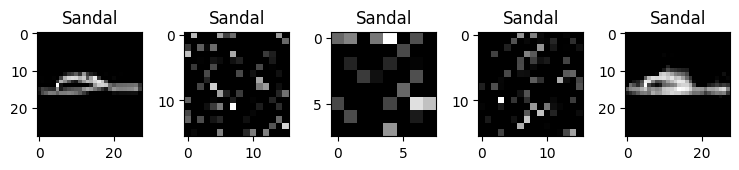

In [7]:
bag_image, bag_label = X_test[8], y_test[8]
bag_outputs = autoencoder_4.forward(bag_image)

bag_layers_to_visualize = [
    bag_image.reshape(28, 28),
    autoencoder_4.hidden_layers[0].outputs.reshape(16, 16),
    autoencoder_4.code.reshape(8, 8),
    autoencoder_4.hidden_layers[4].outputs.reshape(16, 16),
    autoencoder_4.output_layer.outputs.reshape(28, 28),
]

plot_autoencoder_layers(bag_layers_to_visualize, FASHION_MNIST_LABELS[bag_label])

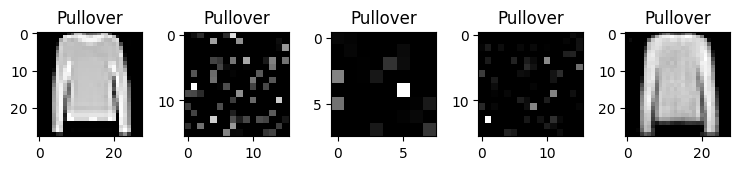

In [8]:
pullover_image, pullover_label = X_test[99], y_test[99]
pullover_outputs = autoencoder_4.forward(pullover_image)

pullover_layers_to_visualize = [
    pullover_image.reshape(28, 28),
    autoencoder_4.hidden_layers[0].outputs.reshape(16, 16),
    autoencoder_4.code.reshape(8, 8),
    autoencoder_4.hidden_layers[4].outputs.reshape(16, 16),
    autoencoder_4.output_layer.outputs.reshape(28, 28),
]

plot_autoencoder_layers(
    pullover_layers_to_visualize, FASHION_MNIST_LABELS[pullover_label]
)

## Visualization of unseen data in a space of low dimensionality with UMAP

### Visualize original test data

C:\Users\kbbgs\OneDrive\Pulpit\neural-networks-labs\venv\Lib\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


<Axes: >

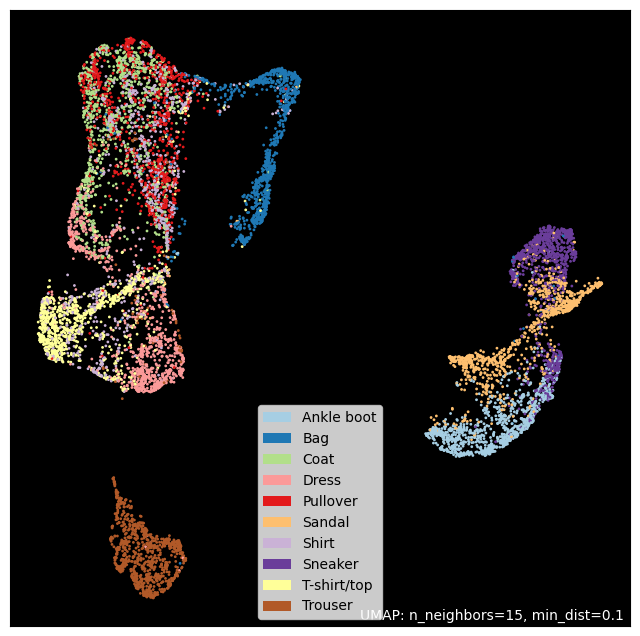

In [9]:
import umap
import umap.plot

from assignment_2.utils.save import to_tsv

reducer = umap.UMAP()
mapper = reducer.fit(X_test)
embeddings_original = mapper.transform(X_test)

y_test_mapped_labels = np.array(list(map(lambda x: FASHION_MNIST_LABELS[x], y_test)))

to_tsv(X_test, "embeddings/embeddings_original.tsv")
to_tsv(y_test_mapped_labels, "embeddings/embeddings_original_metadata.tsv")

umap.plot.points(
    mapper, labels=y_test_mapped_labels, color_key_cmap="Paired", background="black"
)

### Visualize images encoded by Autoencoder 1

In [10]:
codes = np.array([autoencoder_1.encode(sample) for sample in X_test])
codes = codes.reshape(codes.shape[0], codes.shape[2])

to_tsv(codes, "embeddings/code_embeddings_1.tsv")
to_tsv(y_test_mapped_labels, "embeddings/code_embeddings_1_metadata.tsv")

codes.shape

(10000, 64)

<Axes: >

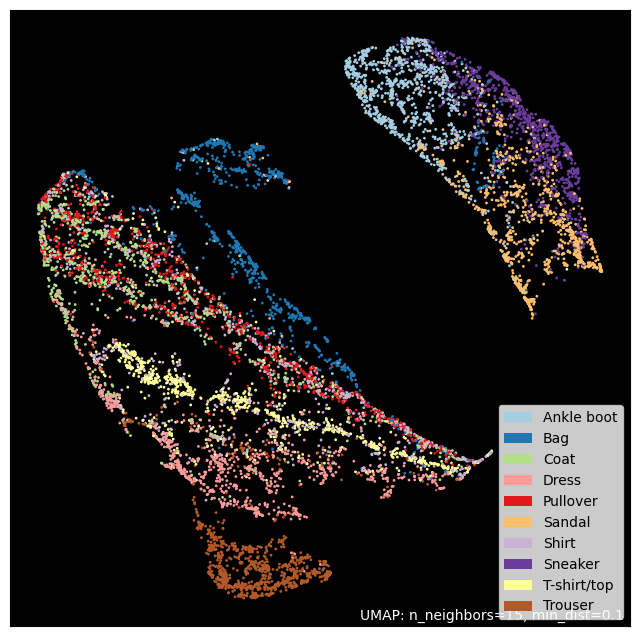

In [11]:
code_mapper = reducer.fit(codes)
code_embeddings = code_mapper.transform(codes)

umap.plot.points(
    code_mapper,
    labels=y_test_mapped_labels,
    color_key_cmap="Paired",
    background="black",
)

### Visualize images encoded by Autoencoder 2

In [12]:
codes = np.array([autoencoder_2.encode(sample) for sample in X_test])
codes = codes.reshape(codes.shape[0], codes.shape[2])

to_tsv(codes, "embeddings/code_embeddings_2.tsv")
to_tsv(y_test_mapped_labels, "embeddings/code_embeddings_2_metadata.tsv")

codes.shape

(10000, 144)

<Axes: >

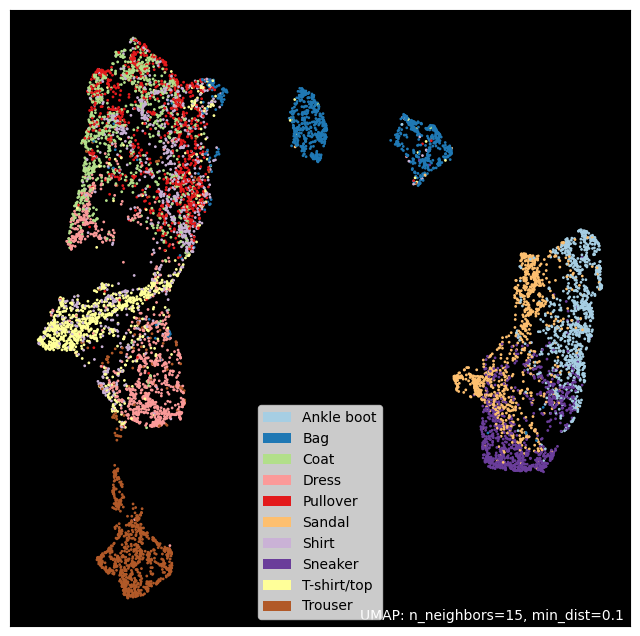

In [13]:
code_mapper = reducer.fit(codes)
code_embeddings = code_mapper.transform(codes)

umap.plot.points(
    code_mapper,
    labels=y_test_mapped_labels,
    color_key_cmap="Paired",
    background="black",
)

### Visualize images encoded by Autoencoder 3

In [14]:
codes = np.array([autoencoder_3.encode(sample) for sample in X_test])
codes = codes.reshape(codes.shape[0], codes.shape[2])

to_tsv(codes, "embeddings/code_embeddings_3.tsv")
to_tsv(y_test_mapped_labels, "embeddings/code_embeddings_3_metadata.tsv")

codes.shape

(10000, 64)

<Axes: >

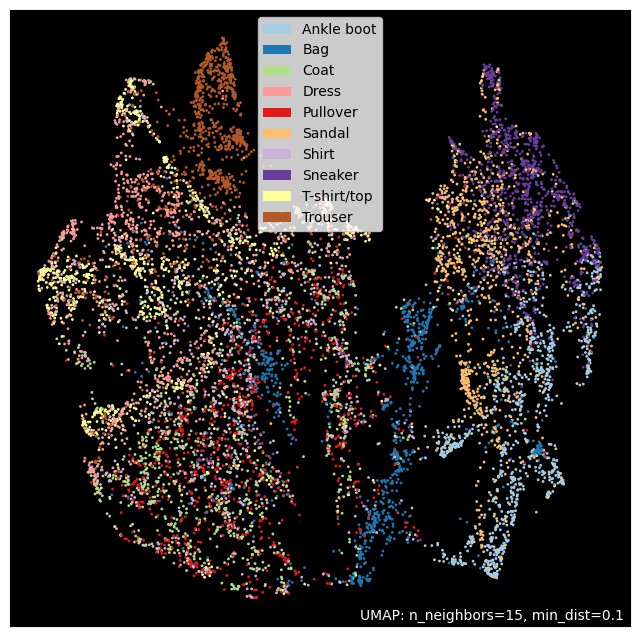

In [15]:
code_mapper = reducer.fit(codes)
code_embeddings = code_mapper.transform(codes)

umap.plot.points(
    code_mapper,
    labels=y_test_mapped_labels,
    color_key_cmap="Paired",
    background="black",
)

### Visualize images encoded by Autoencoder 4

In [16]:
codes = np.array([autoencoder_4.encode(sample) for sample in X_test])
codes = codes.reshape(codes.shape[0], codes.shape[2])

to_tsv(codes, "embeddings/code_embeddings_4.tsv")
to_tsv(y_test_mapped_labels, "embeddings/code_embeddings_4_metadata.tsv")

codes.shape

(10000, 64)

<Axes: >

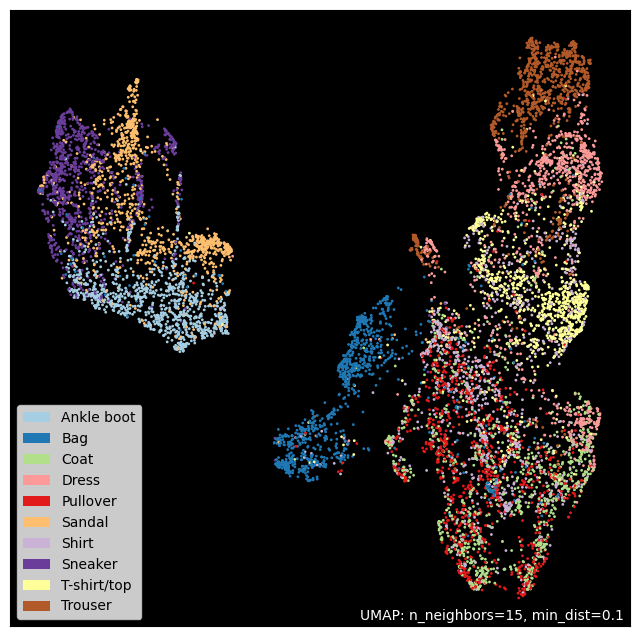

In [17]:
code_mapper = reducer.fit(codes)
code_embeddings = code_mapper.transform(codes)

umap.plot.points(
    code_mapper,
    labels=y_test_mapped_labels,
    color_key_cmap="Paired",
    background="black",
)

### Visualize images encoded by Autoencoder 5

In [18]:
codes = np.array([autoencoder_5.encode(sample) for sample in X_test])
codes = codes.reshape(codes.shape[0], codes.shape[2])

to_tsv(codes, "embeddings/code_embeddings_5.tsv")
to_tsv(y_test_mapped_labels, "embeddings/code_embeddings_5_metadata.tsv")

codes.shape

(10000, 64)

<Axes: >

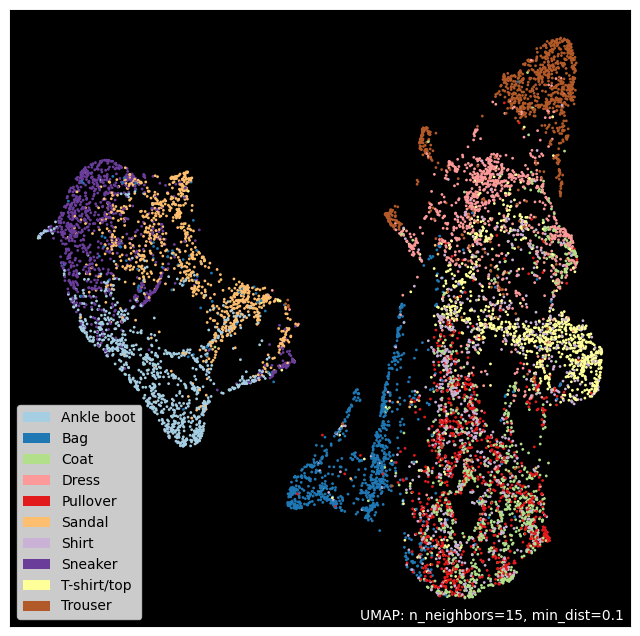

In [19]:
code_mapper = reducer.fit(codes)
code_embeddings = code_mapper.transform(codes)

umap.plot.points(
    code_mapper,
    labels=y_test_mapped_labels,
    color_key_cmap="Paired",
    background="black",
)

## Training classifiers

### Classifier 1 (trained on raw image representations)
#### Model:
- **layers dimensions:** 784, 128, 128, 10
- **batch size:** 128
- **epochs:** 50
- **learning rate:** 0.1
- **shuffle batches:** true

In [21]:
from assignment_2.models import NeuralNetwork
from assignment_2.utils.activation_functions import SoftmaxActivation, ReLUActivation
from assignment_2.utils.weights import HeWeightInitializer
from assignment_2.layer import Layer

layers = [
    Layer(
        input_dim=784,
        num_of_neurons=128,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    Layer(
        input_dim=128,
        num_of_neurons=128,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    Layer(
        input_dim=128,
        num_of_neurons=10,
        weight_initializer=HeWeightInitializer(),
        activation_function=SoftmaxActivation(),
    ),
]

fashion_mnist_classifier = NeuralNetwork(layers=layers)

In [22]:
from assignment_2.utils.loss_functions import CategoricalCrossEntropyLoss
from assignment_2.utils.optimizers import MiniBatchOptimizer
from assignment_2.utils.pickle import dump_pickle


fashion_mnist_classifier_optimizer = MiniBatchOptimizer(
    fashion_mnist_classifier,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=128,
    epochs=50,
    learning_rate=0.1,
    classification=True,
    shuffle=True,
)

fashion_mnist_classifier_optimizer.optimize(X_train, y_train)

Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.7656250 - loss 0.5674249
Epoch 2  --  accuracy 0.7890625 - loss 0.4822328
Epoch 3  --  accuracy 0.7968750 - loss 0.4396878
Epoch 4  --  accuracy 0.8203125 - loss 0.3844848
Epoch 5  --  accuracy 0.8750000 - loss 0.3524055
Epoch 6  --  accuracy 0.8750000 - loss 0.3305325
Epoch 7  --  accuracy 0.8828125 - loss 0.3133758
Epoch 8  --  accuracy 0.8828125 - loss 0.2946541
Epoch 9  --  accuracy 0.8828125 - loss 0.2863273
Epoch 10  --  accuracy 0.8828125 - loss 0.2811287
Epoch 11  --  accuracy 0.8984375 - loss 0.2731323
Epoch 12  --  accuracy 0.9140625 - loss 0.2503518
Epoch 13  --  accuracy 0.9140625 - loss 0.2430216
Epoch 14  --  accuracy 0.9140625 - loss 0.2399811
Epoch 15  --  accuracy 0.9140625 - loss 0.2413049
Epoch 16  --  accuracy 0.9218750 - loss 0.2283935
Epoch 17  --  accuracy 0.9140625 - loss 0.2255721
Epoch 18  --  accuracy 0.9296875 - loss 0.2223217
Epoch 19  --  accuracy 0.9296875 - loss 0.2079823


In [23]:
dump_pickle("pickles/classification_1.pickle", fashion_mnist_classifier)
dump_pickle(
    "pickles/classification_optimizer_1.pickle", fashion_mnist_classifier_optimizer
)

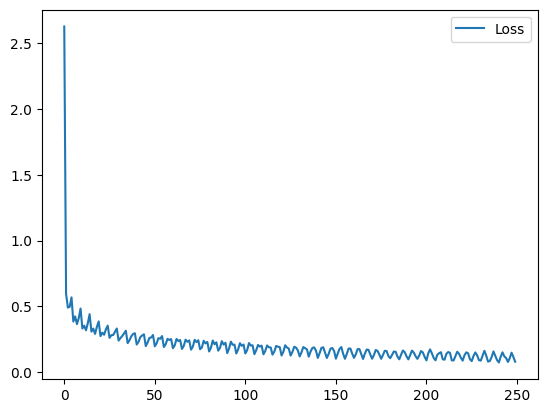

In [24]:
import matplotlib.pyplot as plt

plt.plot(fashion_mnist_classifier_optimizer.all_loss_values, label="Loss")
plt.legend(loc="upper right")
plt.show()

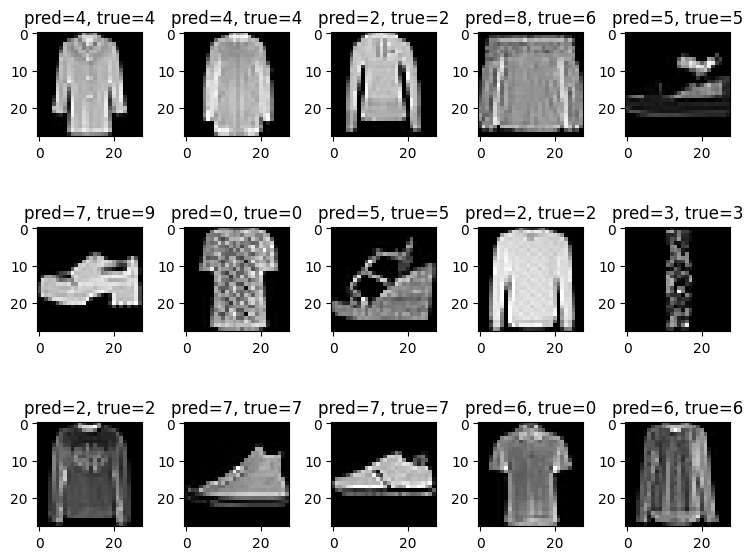

In [25]:
from assignment_2.utils.plot import plot_predictions_randomly

plot_predictions_randomly(fashion_mnist_classifier, X_test, y_test)

### Classifier 2 (trained on autoencoder representations)
#### Model:
- **layers dimensions:** 64, 128, 128, 10
- **batch size:** 128
- **epochs:** 100
- **learning rate:** 0.5
- **shuffle batches:** true

In [26]:
from assignment_2.models import NeuralNetwork
from assignment_2.utils.activation_functions import SoftmaxActivation

layers_2 = [
    Layer(
        input_dim=64,
        num_of_neurons=128,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    Layer(
        input_dim=128,
        num_of_neurons=128,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    Layer(
        input_dim=128,
        num_of_neurons=10,
        weight_initializer=HeWeightInitializer(),
        activation_function=SoftmaxActivation(),
    ),
]

fashion_mnist_classifier_2 = NeuralNetwork(layers=layers_2)

In [27]:
X_train_codes = np.array([autoencoder_4.encode(sample) for sample in X_train])
X_train_codes = X_train_codes.reshape(X_train_codes.shape[0], X_train_codes.shape[2])

X_test_codes = np.array([autoencoder_4.encode(sample) for sample in X_test])
X_test_codes = X_test_codes.reshape(X_test_codes.shape[0], X_test_codes.shape[2])

In [28]:
from assignment_2.utils.loss_functions import CategoricalCrossEntropyLoss


fashion_mnist_classifier_optimizer_2 = MiniBatchOptimizer(
    fashion_mnist_classifier_2,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=128,
    epochs=100,
    learning_rate=0.5,
    classification=True,
    shuffle=True,
)

fashion_mnist_classifier_optimizer_2.optimize(X_train_codes, y_train)

Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.7265625 - loss 0.7069169
Epoch 2  --  accuracy 0.7343750 - loss 0.6204004
Epoch 3  --  accuracy 0.7656250 - loss 0.5834485
Epoch 4  --  accuracy 0.7734375 - loss 0.5673033
Epoch 5  --  accuracy 0.7656250 - loss 0.5425655
Epoch 6  --  accuracy 0.7734375 - loss 0.5282148
Epoch 7  --  accuracy 0.7734375 - loss 0.5092980
Epoch 8  --  accuracy 0.7968750 - loss 0.5004669
Epoch 9  --  accuracy 0.7890625 - loss 0.4931988
Epoch 10  --  accuracy 0.8046875 - loss 0.4883574
Epoch 11  --  accuracy 0.8046875 - loss 0.4777802
Epoch 12  --  accuracy 0.8281250 - loss 0.4692651
Epoch 13  --  accuracy 0.8203125 - loss 0.4666706
Epoch 14  --  accuracy 0.8125000 - loss 0.4642703
Epoch 15  --  accuracy 0.8281250 - loss 0.4602866
Epoch 16  --  accuracy 0.8281250 - loss 0.4482319
Epoch 17  --  accuracy 0.8437500 - loss 0.4470037
Epoch 18  --  accuracy 0.8437500 - loss 0.4443021
Epoch 19  --  accuracy 0.8437500 - loss 0.4324549


In [29]:
dump_pickle("pickles/classification_2.pickle", fashion_mnist_classifier_2)
dump_pickle(
    "pickles/classification_optimizer_2.pickle", fashion_mnist_classifier_optimizer_2
)

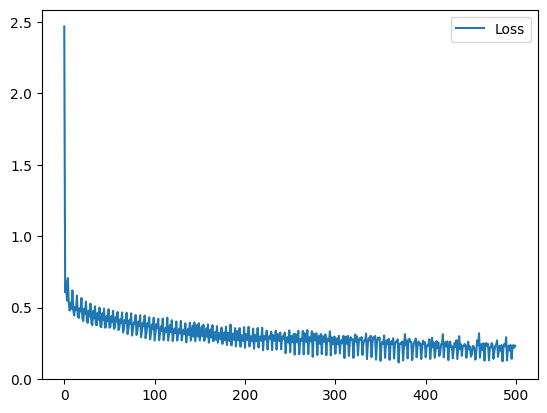

In [30]:
plt.plot(fashion_mnist_classifier_optimizer_2.all_loss_values, label="Loss")
plt.legend(loc="upper right")
plt.show()

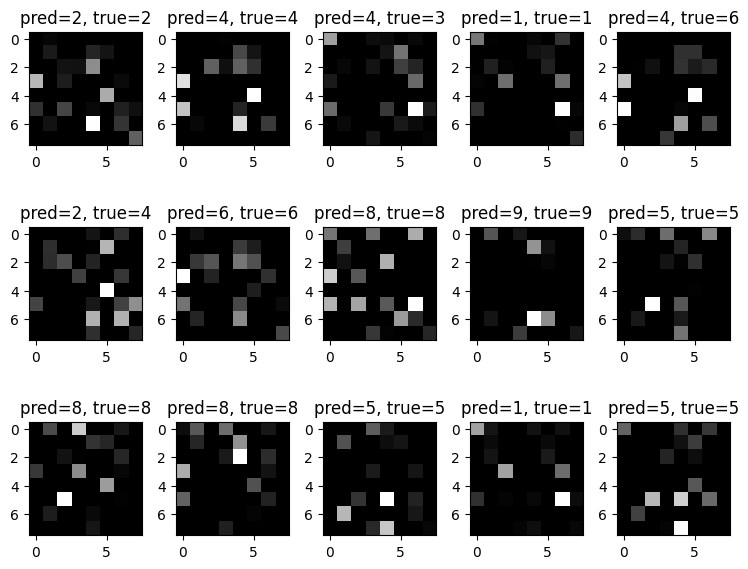

In [33]:
plot_predictions_randomly(fashion_mnist_classifier_2, X_test_codes, y_test, shape=8)